# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [3]:
# 1. Carregar os dados
df = pd.read_csv('housing.csv')

# 2. Limpeza: Remover linhas que possuem valores vazios (comum em 'total_bedrooms')
df = df.dropna()

# 3. Transformação: Converter a coluna de texto 'ocean_proximity' em colunas numéricas (Dummies)
# Isso criará colunas como 'ocean_proximity_NEAR BAY' com valores 0 ou 1
df_preparado = pd.get_dummies(df, columns=['ocean_proximity'])

# 4. Verificação: Mostrar as primeiras linhas para garantir que tudo é número agora
df_preparado.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

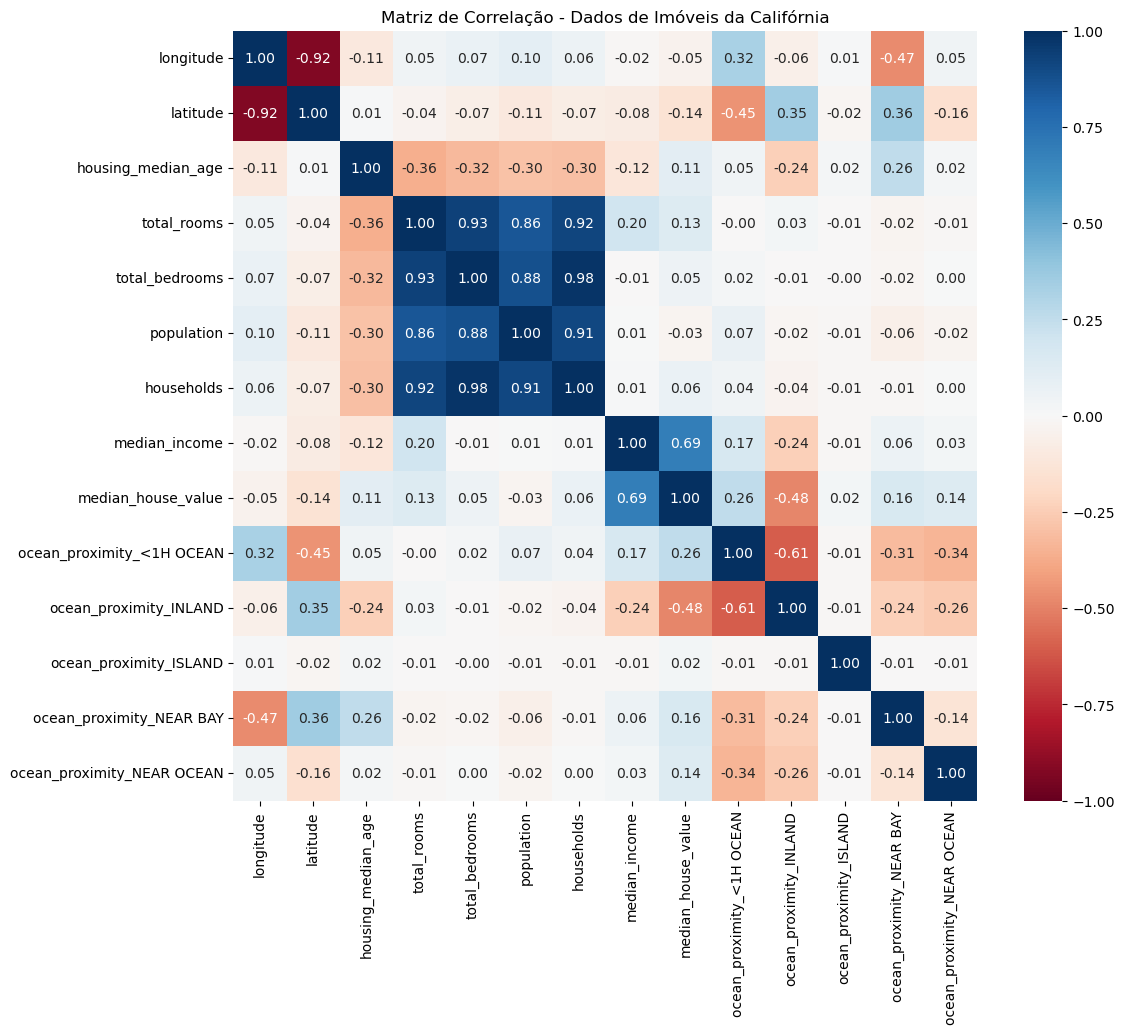

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular a matriz de correlação
# O .corr() calcula a relação entre todas as colunas numéricas
correlacao = df_preparado.corr()

# 2. Configurar o visual do gráfico
plt.figure(figsize=(12, 10))

# 3. Criar o Heatmap (Mapa de Calor)
# annot=True coloca os números dentro dos quadrados
# cmap='RdBu' usa vermelho para correlação negativa e azul para positiva
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='RdBu', vmin=-1, vmax=1)

plt.title("Matriz de Correlação - Dados de Imóveis da Califórnia")
plt.show()

### 3. Separe os dados em validação e teste

In [5]:
from sklearn.model_selection import train_test_split

# 1. Separar a variável alvo (y) das variáveis explicativas (X)
# O y é o preço da casa
y = df_preparado['median_house_value']

# O X são todas as outras colunas 
X = df_preparado.drop('median_house_value', axis=1)

# 2. Dividir os dados: 80% para treino e 20% para teste
# O random_state=42 serve para que o sorteio seja sempre o mesmo se você rodar de novo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Conferir o tamanho dos grupos criados
print(f"Dados de Treino: {X_train.shape[0]} linhas")
print(f"Dados de Teste: {X_test.shape[0]} linhas")

Dados de Treino: 16346 linhas
Dados de Teste: 4087 linhas


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [6]:
from sklearn.tree import DecisionTreeRegressor

# 1. Instanciar os dois modelos com as profundidades solicitadas
# O random_state garante que, se houver empate em algum split, a escolha seja a mesma
regr_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
regr_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)

# 2. Treinar os modelos (Fit) usando apenas os dados de treinamento
regr_depth_2.fit(X_train, y_train)
regr_depth_8.fit(X_train, y_train)

print("As duas árvores foram treinadas com sucesso!")

As duas árvores foram treinadas com sucesso!


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [7]:
from sklearn.metrics import mean_squared_error

# 1. Calculando o MSE para a Árvore de Profundidade 2
mse_train_2 = mean_squared_error(y_train, regr_depth_2.predict(X_train))
mse_test_2 = mean_squared_error(y_test, regr_depth_2.predict(X_test))

# 2. Calculando o MSE para a Árvore de Profundidade 8
mse_train_8 = mean_squared_error(y_train, regr_depth_8.predict(X_train))
mse_test_8 = mean_squared_error(y_test, regr_depth_8.predict(X_test))

# Exibindo os resultados
print(f"Árvore (Profundidade 2):")
print(f" - MSE Treino: {mse_train_2:,.2f}")
print(f" - MSE Teste:  {mse_test_2:,.2f}")
print("\n" + "-"*30 + "\n")
print(f"Árvore (Profundidade 8):")
print(f" - MSE Treino: {mse_train_8:,.2f}")
print(f" - MSE Teste:  {mse_test_8:,.2f}")

Árvore (Profundidade 2):
 - MSE Treino: 6,688,828,024.52
 - MSE Teste:  6,916,498,324.43

------------------------------

Árvore (Profundidade 8):
 - MSE Treino: 3,201,632,810.13
 - MSE Teste:  4,073,282,126.94


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [8]:

r2_2 = regr_depth_2.score(X_test, y_test)
r2_8 = regr_depth_8.score(X_test, y_test)

print(f"A árvore de profundidade 2 explica {r2_2:.2%} da variação dos preços.")
print(f"A árvore de profundidade 8 explica {r2_8:.2%} da variação dos preços.")

A árvore de profundidade 2 explica 49.42% da variação dos preços.
A árvore de profundidade 8 explica 70.21% da variação dos preços.


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

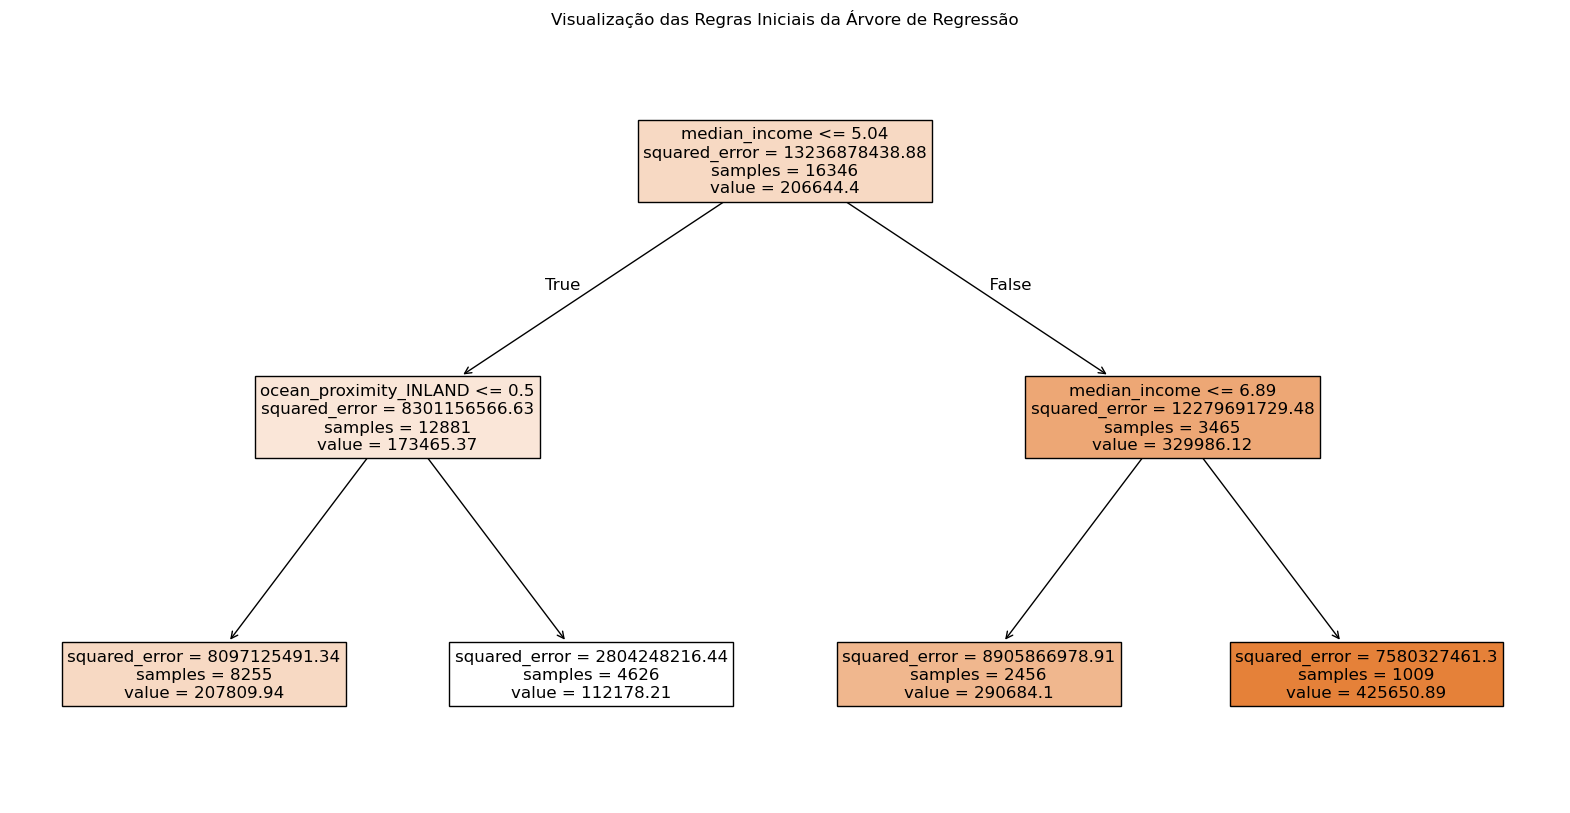

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Configurar o tamanho da imagem
plt.figure(figsize=(20, 10))

# 2. Plotar a árvore de profundidade 2
tree.plot_tree(regr_depth_2, 
               feature_names=X.columns,  # Usa os nomes das colunas (renda, quartos, etc)
               filled=True,              # Colore os nós para facilitar a leitura
               fontsize=12, 
               precision=2)              # Arredonda os números para 2 casas decimais

plt.title("Visualização das Regras Iniciais da Árvore de Regressão")
plt.show()